<a href="https://colab.research.google.com/github/saeidakbari3364/Deep-Learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation To Address Overfitting In Flower Classification CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228813984/228813984 [==============================] - 10s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/sunflowers/14741813010_5d44e33088_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4868595281_1e58083785.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/27465811_9477c9d044.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054864058_2edca122a9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6050020905_881295ac72_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8987479080_32ab912d10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6108118824_5b0231a56d.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3550491463_3eb092054c_m.jpg')]

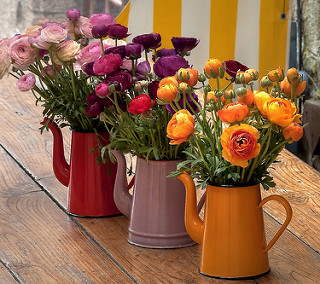

In [8]:
PIL.Image.open(str(roses[0]))


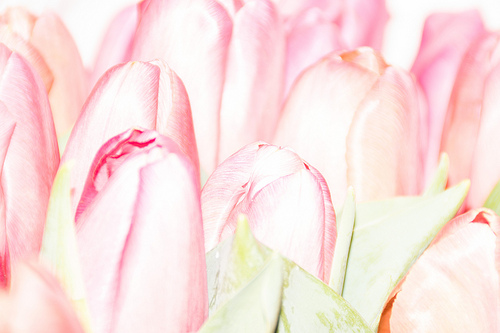

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/4588034197_e300b0872a_n.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(284, 320, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 11s 24ms/step - loss: 1.3395 - accuracy: 0.4066
Epoch 2/30
86/86 [==============================] - 2s 25ms/step - loss: 0.9919 - accuracy: 0.6137
Epoch 3/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8448 - accuracy: 0.6795
Epoch 4/30
86/86 [==============================] - 2s 24ms/step - loss: 0.6850 - accuracy: 0.7398
Epoch 5/30
86/86 [==============================] - 2s 24ms/step - loss: 0.4923 - accuracy: 0.8365
Epoch 6/30
86/86 [==============================] - 2s 24ms/step - loss: 0.2773 - accuracy: 0.9052
Epoch 7/30
86/86 [==============================] - 2s 24ms/step - loss: 0.1480 - accuracy: 0.9557
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0996 - accuracy: 0.9684
Epoch 9/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0804 - accuracy: 0.9782
Epoch 10/30
86/86 [==============================] - 2s 25ms/step - loss: 0.0614 - accuracy: 0.9851
Epoch 11

In [21]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 21ms/step - loss: 2.4107 - accuracy: 0.6492


[2.4107296466827393, 0.6492374539375305]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (64.92%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 19ms/step


array([[  1.0121818 ,  11.874982  ,   4.3756747 , -12.77646   ,
          2.2526546 ],
       [  6.893235  ,  -1.6785932 ,  -8.789307  ,  -7.3513412 ,
         10.188128  ],
       [ -6.421754  ,   1.6497113 ,   8.870081  ,  -3.7907393 ,
         -1.5438434 ],
       ...,
       [ -2.2951655 ,  -1.6669518 ,   4.1434965 ,   2.169658  ,
         -1.266145  ],
       [  8.878869  ,  -0.31820124,  -5.0728817 ,  -5.834234  ,
          3.5680802 ],
       [ -4.581474  , -16.360352  ,  10.467768  ,   1.6567472 ,
         11.318596  ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

Improve Test Accuracy Using Data Augmentation


In [28]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

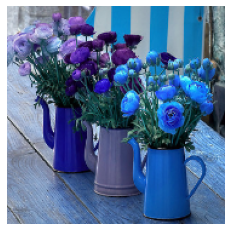

In [29]:
plt.axis('off')
plt.imshow(X[0])


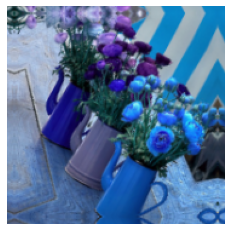

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [31]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 5s 45ms/step - loss: 1.3612 - accuracy: 0.4255
Epoch 2/30
86/86 [==============================] - 4s 44ms/step - loss: 1.0718 - accuracy: 0.5781
Epoch 3/30
86/86 [==============================] - 4s 51ms/step - loss: 0.9685 - accuracy: 0.6195
Epoch 4/30
86/86 [==============================] - 4s 51ms/step - loss: 0.9071 - accuracy: 0.6486
Epoch 5/30
86/86 [==============================] - 4s 44ms/step - loss: 0.8579 - accuracy: 0.6711
Epoch 6/30
86/86 [==============================] - 4s 44ms/step - loss: 0.7939 - accuracy: 0.6969
Epoch 7/30
86/86 [==============================] - 4s 44ms/step - loss: 0.7521 - accuracy: 0.7122
Epoch 8/30
86/86 [==============================] - 4s 44ms/step - loss: 0.7315 - accuracy: 0.7227
Epoch 9/30
86/86 [==============================] - 4s 43ms/step - loss: 0.7091 - accuracy: 0.7253
Epoch 10/30
86/86 [==============================] - 4s 44ms/step - loss: 0.6818 - accuracy: 0.7398
Epoch 11/

In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 20ms/step - loss: 0.9301 - accuracy: 0.7342


[0.9301157593727112, 0.7342047691345215]